In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\oxygen_crises.csv")

In [3]:
df.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,galabhupesh,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,524,@ANI When Court asked for Oxygen Audits and wh...,0,False
1,its_sreedhar,NaN,Twitter for Android,NaN,2021-05-09 15:40:48,True,217,AP gov sanctioned 310cr for 49 oxygen plants f...,0,False
2,khansahilrehab,"Patna, India",Twitter for iPhone,NaN,2021-05-09 15:40:48,False,337,@thevirdas Only Oxygen and steroids seem to wo...,0,False
3,ArunGarimella,"Vijayawada, India",Twitter for Android,NaN,2021-05-09 15:40:46,False,93,"Sir, Need Oxygen bed urgently in Vijayawada , ...",0,False
4,iprachi_singh,"Rajasthan, India",Twitter for Android,NaN,2021-05-09 15:40:45,False,926,@dulcetchani @TajinderBagga @yuvahallabol I th...,0,False


In [4]:
Data=pd.DataFrame(df.text)

In [5]:
Data

,text
0,@ANI When Court asked for Oxygen Audits and wh...
1,AP gov sanctioned 310cr for 49 oxygen plants f...
2,@thevirdas Only Oxygen and steroids seem to wo...
3,"Sir, Need Oxygen bed urgently in Vijayawada , ..."
4,@dulcetchani @TajinderBagga @yuvahallabol I th...
...,...
995,150 oxygen concentrator for a population above...
996,Need A oxygen cylinder urgently\nKindly help\n...
997,Hospitalbeds #Ahmedabad\n\nCivil Hospital Ahme...
998,"@kimggugie No, im here but i need oxygen rn"


## Data cleaning

#### LowerCase 

In [8]:
Data.text=Data.text.str.lower()

In [9]:
Data.iloc[8,0]

'@sootradhar @vasudevanl5 you know the company that would have sold the oxygen concentrator would have it made in 17… https://t.co/jrhu5ykgcg'

#### http/www Removal

In [11]:
Data.text=Data.text.replace('http\S+|www\S+','',regex=True)

In [12]:
Data.iloc[8,0]

'@sootradhar @vasudevanl5 you know the company that would have sold the oxygen concentrator would have it made in 17… '

### Punctuation Removal

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(abc):
    no_punct="".join([c for c in abc if c not in string.punctuation])
    return no_punct
Data.text=Data.text.apply(lambda x:remove_punct(x))

In [16]:
Data.text

0      ani when court asked for oxygen audits and whe...
1      ap gov sanctioned 310cr for 49 oxygen plants f...
2      thevirdas only oxygen and steroids seem to wor...
3      sir need oxygen bed urgently in vijayawada  an...
4      dulcetchani tajinderbagga yuvahallabol i think...
                             ...                        
995    150 oxygen concentrator for a population above...
996    need a oxygen cylinder urgently\nkindly help\n...
997    hospitalbeds ahmedabad\n\ncivil hospital ahmed...
998            kimggugie no im here but i need oxygen rn
999    please help me my father want oxygen cylinder ...
Name: text, Length: 1000, dtype: object

#### Number removal

In [18]:
Data.text=Data.text.replace(r'\d+','',regex=True)

In [19]:
Data.iloc[8,0]

'sootradhar vasudevanl you know the company that would have sold the oxygen concentrator would have it made in … '

### Remove stopwords

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
print( "Number of stopwords:" ,len(stop))


Number of stopwords: 198


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def remove_stop(x):
    no_stop=" ".join([c
                     for c in x.split()
                     if c not in stop])
    return no_stop

Data.text=Data.text.apply(lambda x :remove_stop(x))

In [23]:
Data.text

0      ani court asked oxygen audits near ones got ca...
1      ap gov sanctioned cr oxygen plants districts s...
2      thevirdas oxygen steroids seem work rest equiv...
3      sir need oxygen bed urgently vijayawada andhra...
4      dulcetchani tajinderbagga yuvahallabol think n...
                             ...                        
995              oxygen concentrator population crore🥴🤬🤯
996    need oxygen cylinder urgently kindly help urge...
997    hospitalbeds ahmedabad civil hospital ahmedaba...
998                          kimggugie im need oxygen rn
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

In [24]:
import re
nltk.download('words')
words=set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
len(words)

235892

In [26]:
def cleantext_round2(text,words):
    text=text.lower()
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) 
    text=re.sub('[^a-z\s]','',text)
    tokens=nltk.word_tokenize(text)
    cleaned_tokens=[]
    for w in tokens:
        if len(w)>=3 and w in words:
            cleaned_tokens.append(w)
            
    return " ".join(cleaned_tokens)
        
Data.text=Data.text.apply(lambda x:cleantext_round2(x,words))

In [27]:
Data.text

0           ani court oxygen near got caught said enough
1                  oxygen said become operational within
2      oxygen seem work rest equivocal evidence prone...
3      sir need oxygen bed urgently patient name age ...
4                                think normal oxygen bed
                             ...                        
995                 oxygen concentrator population crore
996    need oxygen cylinder urgently kindly help urge...
997                        civil hospital oxygen general
998                                          need oxygen
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

In [28]:
Data.iloc[66,0]

'hospital hospital availability oxygen contact'

In [29]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v")
            for w in word_tokenizer.tokenize(text)]

In [31]:
Data.iloc[66,0]

'hospital hospital availability oxygen contact'

In [32]:
Data.text.apply(lambda x:' '.join(lemmatize_text(x)))

0             ani court oxygen near get catch say enough
1                   oxygen say become operational within
2      oxygen seem work rest equivocal evidence prone...
3      sir need oxygen bed urgently patient name age ...
4                                think normal oxygen bed
                             ...                        
995                 oxygen concentrator population crore
996    need oxygen cylinder urgently kindly help urge...
997                        civil hospital oxygen general
998                                          need oxygen
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

In [33]:
Data.iloc[66,0]

'hospital hospital availability oxygen contact'

In [34]:
Data.text=Data.text.astype(str).str.rstrip()

In [35]:
Data.text

0           ani court oxygen near got caught said enough
1                  oxygen said become operational within
2      oxygen seem work rest equivocal evidence prone...
3      sir need oxygen bed urgently patient name age ...
4                                think normal oxygen bed
                             ...                        
995                 oxygen concentrator population crore
996    need oxygen cylinder urgently kindly help urge...
997                        civil hospital oxygen general
998                                          need oxygen
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

In [36]:
Data.head()

,text
0,ani court oxygen near got caught said enough
1,oxygen said become operational within
2,oxygen seem work rest equivocal evidence prone...
3,sir need oxygen bed urgently patient name age ...
4,think normal oxygen bed


In [37]:
Data.drop_duplicates()

,text
0,ani court oxygen near got caught said enough
1,oxygen said become operational within
2,oxygen seem work rest equivocal evidence prone...
3,sir need oxygen bed urgently patient name age ...
4,think normal oxygen bed
...,...
993,next couple days hospital house start operatio...
994,black marketing oxygen
995,oxygen concentrator population crore
997,civil hospital oxygen general


In [38]:
Data.text

0           ani court oxygen near got caught said enough
1                  oxygen said become operational within
2      oxygen seem work rest equivocal evidence prone...
3      sir need oxygen bed urgently patient name age ...
4                                think normal oxygen bed
                             ...                        
995                 oxygen concentrator population crore
996    need oxygen cylinder urgently kindly help urge...
997                        civil hospital oxygen general
998                                          need oxygen
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

### Term-Document Matrix

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words='english')
DF_cv=cv.fit_transform(Data.text)
DF_cv_dtm=pd.DataFrame(DF_cv.toarray(),columns=cv.get_feature_names_out())
DF_cv_dtm.T


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yogi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
DF_Trans=DF_cv_dtm.T

In [44]:
DF_Trans

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yogi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
DF_Trans['freq']=DF_Trans.sum(axis=1)

In [48]:
DF_Trans

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
yogi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
DF_Trans=DF_Trans.reset_index()

In [52]:
DF_Trans

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abiding,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,yoga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1472,yogi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1473,young,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1474,youve,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
Te_Do_mat=DF_Trans[['index','freq']].sort_values(by='freq',ascending=False).head(10)
Te_Do_mat

,index,freq
885,oxygen,760
844,need,135
589,hospital,89
266,covid,73
109,bed,68
570,help,59
89,available,53
286,cylinder,49
1164,sir,49
906,people,49


### wordcloud

In [56]:
Data.text

0           ani court oxygen near got caught said enough
1                  oxygen said become operational within
2      oxygen seem work rest equivocal evidence prone...
3      sir need oxygen bed urgently patient name age ...
4                                think normal oxygen bed
                             ...                        
995                 oxygen concentrator population crore
996    need oxygen cylinder urgently kindly help urge...
997                        civil hospital oxygen general
998                                          need oxygen
999    please help father want oxygen cylinder level ...
Name: text, Length: 1000, dtype: object

### wordcloud

In [58]:
text = " ".join(abc for abc in Data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 40110 words in the combination of all review.


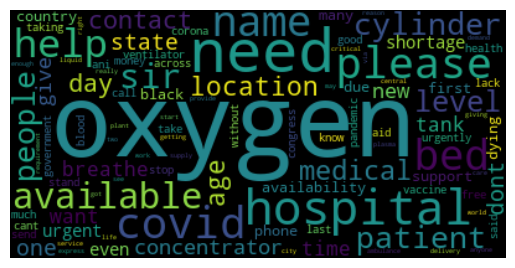

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                      max_words=100).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

### Sentiment Analysis

In [62]:
Data

,text
0,ani court oxygen near got caught said enough
1,oxygen said become operational within
2,oxygen seem work rest equivocal evidence prone...
3,sir need oxygen bed urgently patient name age ...
4,think normal oxygen bed
...,...
995,oxygen concentrator population crore
996,need oxygen cylinder urgently kindly help urge...
997,civil hospital oxygen general
998,need oxygen


In [64]:
from textblob import TextBlob

Data['polarity']=Data.text.apply(lambda x:TextBlob(x).sentiment.polarity)
Data

,text,polarity
0,ani court oxygen near got caught said enough,0.05
1,oxygen said become operational within,0.00
2,oxygen seem work rest equivocal evidence prone...,0.00
3,sir need oxygen bed urgently patient name age ...,0.00
4,think normal oxygen bed,0.15
...,...,...
995,oxygen concentrator population crore,0.00
996,need oxygen cylinder urgently kindly help urge...,0.60
997,civil hospital oxygen general,0.05
998,need oxygen,0.00


In [66]:
Data['sentiment']=np.where(Data.polarity>0.5,'Good','Bad')
Data.head()

,text,polarity,sentiment
0,ani court oxygen near got caught said enough,0.05,Bad
1,oxygen said become operational within,0.00,Bad
2,oxygen seem work rest equivocal evidence prone...,0.00,Bad
3,sir need oxygen bed urgently patient name age ...,0.00,Bad
4,think normal oxygen bed,0.15,Bad


In [68]:
Data.sentiment.value_counts()

sentiment
Bad     973
Good     27
Name: count, dtype: int64

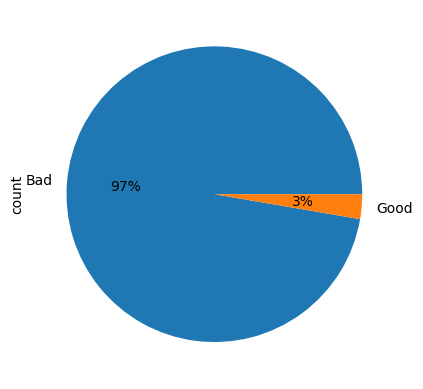

In [70]:
Data.sentiment.value_counts().plot.pie(autopct="%0.0f%%");

In [72]:
Data

,text,polarity,sentiment
0,ani court oxygen near got caught said enough,0.05,Bad
1,oxygen said become operational within,0.00,Bad
2,oxygen seem work rest equivocal evidence prone...,0.00,Bad
3,sir need oxygen bed urgently patient name age ...,0.00,Bad
4,think normal oxygen bed,0.15,Bad
...,...,...,...
995,oxygen concentrator population crore,0.00,Bad
996,need oxygen cylinder urgently kindly help urge...,0.60,Good
997,civil hospital oxygen general,0.05,Bad
998,need oxygen,0.00,Bad


In [74]:
Data2=Data.drop(columns=['polarity','sentiment'])

In [76]:
Data2

,text
0,ani court oxygen near got caught said enough
1,oxygen said become operational within
2,oxygen seem work rest equivocal evidence prone...
3,sir need oxygen bed urgently patient name age ...
4,think normal oxygen bed
...,...
995,oxygen concentrator population crore
996,need oxygen cylinder urgently kindly help urge...
997,civil hospital oxygen general
998,need oxygen


### Tf-IDF

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
model=TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
 
# just send in all your docs here 
output=model.fit_transform(Data2.text)

feature_names=model.get_feature_names_out()

output2=pd.DataFrame(output.toarray(),index=Data2.index,columns=feature_names)

output2


,abide,abiding,ability,able,absence,absolute,absolutely,abundance,access,accomplish,...,yah,yeah,year,yes,yesterday,yoga,yogi,young,youve,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
Data2['impword']=output2.idxmax(axis=1)
Data2['max_score']=output2.max(axis=1)
Data2[['text','impword','max_score']]

,text,impword,max_score
0,ani court oxygen near got caught said enough,caught,0.468613
1,oxygen said become operational within,operational,0.777651
2,oxygen seem work rest equivocal evidence prone...,equivocal,0.428410
3,sir need oxygen bed urgently patient name age ...,urgently,0.464419
4,think normal oxygen bed,normal,0.666788
...,...,...,...
995,oxygen concentrator population crore,population,0.640484
996,need oxygen cylinder urgently kindly help urge...,cinema,0.383245
997,civil hospital oxygen general,civil,0.691759
998,need oxygen,need,0.917843
